# Dartboard as an Object Function
### Seminar work on Heuristic Optimalization
#### Author: Ales Suchomel
#### Year: 2020

### Introduction

This paper builds on [MMC seminar work (Czech)](files/sources/ales_suchomel_mmc_zapoctova_prace.pdf) focusing on problem definition, psoudo-random data generation and monte-carlo integration. Most of the theory, including domain explanation and derivation of the object function, is also already processed there with only one exeption, the optimalization itself. 

An interesting particle-flock based heuristic was used for that purpose, but its performance was not tested at all and it was used just as black-box code implemented as an Ondrej Panek's bachelor thesis. 

Therefore, the purpose of this paper is to complete the previous seminar work by finding the right heuristic for the optimalization.

### Goals
The formal goal of this paper is to find a point to aim the dart at that ensures the highest expected score from a single throw. Thanks to an interesting structure of the dartboard, the optimal point is not always in the middle of the target but rather depends on the player's skills. The final output should be a graph of development of the best strategy depending on player's throw variance.

The real motivation for this theme is the posibility to test different heuristics at optimalizing real-world-based non-trivial object function with local minima that is very easy to interpret. In other words, gain some experience with heruristics optimalizing known function, so they can be trusted and successfully used at unknown later.

Moreover, the object function is parametric. If the player is one hundered percent accurate, the function is not continuous but contains several levels. In reality, there is some variance in player's throws and therefore, the shape of the function smooths to a mountain range like surface. An interesting question is how different heuristics will perform in both cases.

## Object function
The object function represents the dartboard and player's skills. It is not generally continuous, it contains approximately 30 evenly distributed local minima, and is limited, see fig below. We do not generally know its optimal value, but we can determine it for some values of its parameters.

It is defined on 2-dimensional, limited, continuous area, but for optimalization purposes it is possible to lay 1mm grid, as player is not able to aim more precisely and the peaks will not be that sharp. It would made possible to evaluate the object function in aproximately 40 thousands points.

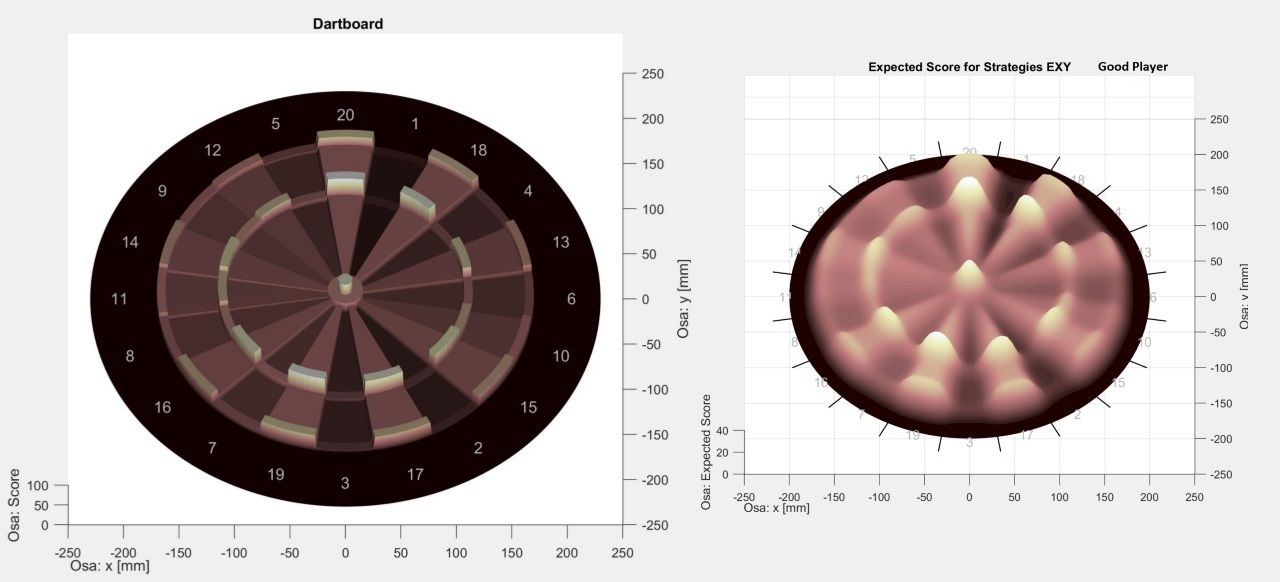

## Heuristic
Good results require chosen heuristic to succesfully identify the right peak that contains the optimal value. So reliability is the key metric here. However, evaluation of the object function requires computing an integral using monte-carlo method, which is time consuming so the heuristic must make do with as little object function evaluation as possible, otherwise the required parametric analysis would be very computationally demanding or impossible at all.

Reliability: over 95 %.

Number of Evaluation: less then 1000.

### Workflow outline:
1. Rewriting object functions from MATLAB to course-specific python interface
2. Rewriting MATLABs dartboard plotter to python
3. Implementing general object for simpler experimenting with heuristics
4. Experimenting with heuristics from this course framework without using detailed information about object function
   1. Testing heuristics on dartboard itself without tying the variance of the throw
   2. Specifing variance of a very good player, calculating optimal value of such object function
   3. Testing heuristics on defined smooth good-player object function
   4. Comparing heuristic performances on both variants of the object function
   5. Choosing the most promising heuristic and trying to improve its performace by tuning hyperparameters
5. Using the tuned heuristics for parametric analysis of optimal dart strategies
6. Discussing the results and heuristics performances 

In [1]:
# Import path to source directory
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..','..', 'src')))

# Ensure modules are reloaded on any change
%load_ext autoreload
%autoreload 2

In [2]:
# Import extrenal librarires
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import our code
from objfun_darts import Dartboard, DartsAvgScore
from objfun_darts import DartsPlotter

In [3]:
# dartboard = Dartboard()
# plotter = DartsPlotter()
# plotter.plot_points(dartboard, [np.array([0, 50]), np.array([10, 130])])

In [4]:
# dartboard = DartsAvgScore(10)
# plotter = DartsPlotter()
# plotter.plot_dartboard(dartboard)

In [5]:
from heur_sg import ShootAndGo
from objfun_sumsin import SumSin

In [6]:
from experimenting import ExperimentPerformer

In [20]:
performer = ExperimentPerformer()
dartboard = Dartboard()
maxeval = 1000;
hmax = 10;
heur = ShootAndGo(dartboard, maxeval=maxeval, hmax=hmax)

In [8]:
NUM_RUNS = 10;
performer.experiment(heur, NUM_RUNS)

HBox(children=(FloatProgress(value=0.0, description='SG_SD', max=10.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

,of,heur,run,best_x,best_y,maxeval,neval
0,dartboard,SG_SD_hmax=10,1,"[-35.8, -108.7]",[-57],1000,inf
1,dartboard,SG_SD_hmax=10,2,"[2.1, 4.6]",[-50],1000,inf
2,dartboard,SG_SD_hmax=10,3,"[-101.8, 50.2]",[-42],1000,inf
3,dartboard,SG_SD_hmax=10,4,"[10.5, 112.7]",[-60],1000,41.0
4,dartboard,SG_SD_hmax=10,5,"[-39.7, -107.1]",[-57],1000,inf
5,dartboard,SG_SD_hmax=10,6,"[-35.7, -103.9]",[-57],1000,inf
6,dartboard,SG_SD_hmax=10,7,"[-3.1, 0.7]",[-50],1000,inf
7,dartboard,SG_SD_hmax=10,8,"[5.1, -0.3]",[-50],1000,inf
8,dartboard,SG_SD_hmax=10,9,"[16.0, 109.0]",[-60],1000,531.0
9,dartboard,SG_SD_hmax=10,10,"[5.5, 1.1]",[-50],1000,inf


In [9]:
performer.get_stats()

,of,heur,feo,mne,rel
0,dartboard,SG_SD_hmax=10,1430.0,286.0,0.2


In [10]:
heur = ShootAndGo(dartboard, maxeval=maxeval, hmax=0)
performer.experiment(heur,10)

HBox(children=(FloatProgress(value=0.0, description='SG_RS', max=10.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

,of,heur,run,best_x,best_y,maxeval,neval
0,dartboard,SG_RS_hmax=0,11,"[11.0, 110.0]",[-60],1000,233.0
1,dartboard,SG_RS_hmax=0,12,"[-33.4, -104.4]",[-57],1000,inf
2,dartboard,SG_RS_hmax=0,13,"[-16.4, 106.6]",[-60],1000,770.0
3,dartboard,SG_RS_hmax=0,14,"[-12.2, 113.9]",[-60],1000,99.0
4,dartboard,SG_RS_hmax=0,15,"[-4.6, 110.1]",[-60],1000,576.0
5,dartboard,SG_RS_hmax=0,16,"[-17.2, 111.7]",[-60],1000,765.0
6,dartboard,SG_RS_hmax=0,17,"[-9.4, 109.2]",[-60],1000,82.0
7,dartboard,SG_RS_hmax=0,18,"[-15.6, 112.0]",[-60],1000,539.0
8,dartboard,SG_RS_hmax=0,19,"[-5.4, 107.2]",[-60],1000,193.0
9,dartboard,SG_RS_hmax=0,20,"[-11.5, 114.1]",[-60],1000,508.0


In [11]:
performer.get_stats()

,of,heur,feo,mne,rel
0,dartboard,SG_RS_hmax=0,464.814815,418.333333,0.9
1,dartboard,SG_SD_hmax=10,1430.000000,286.000000,0.2


In [13]:
from heur_fsa import FastSimulatedAnnealing
from heur_aux import Correction, CauchyMutation

In [14]:
for T0 in [1e-10, 1e-2, 1, np.inf]:
    mut = CauchyMutation(r=0.5, correction=Correction(dartboard))
    heur = FastSimulatedAnnealing(dartboard, maxeval=maxeval, T0=T0, n0=1, alpha=2, mutation=mut)
    display(performer.experiment(heur, 10))

HBox(children=(FloatProgress(value=0.0, description='FSA', max=10.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

,of,heur,run,best_x,best_y,maxeval,neval
0,dartboard,FSA_T0=1e-10_n0=1_alpha=2,21,"[27.872555009071927, -111.5403955638275]",[-51],1000,inf
1,dartboard,FSA_T0=1e-10_n0=1_alpha=2,22,"[-12.255299069234047, 112.70079399814144]",[-60],1000,97.0
2,dartboard,FSA_T0=1e-10_n0=1_alpha=2,23,"[-111.50663767429754, 22.538119799099544]",[-42],1000,inf
3,dartboard,FSA_T0=1e-10_n0=1_alpha=2,24,"[-35.56676750745402, -108.50685830658747]",[-57],1000,inf
4,dartboard,FSA_T0=1e-10_n0=1_alpha=2,25,"[51.11792682354912, 98.15042392663847]",[-54],1000,inf
5,dartboard,FSA_T0=1e-10_n0=1_alpha=2,26,"[-105.64482411098231, 28.00232492531352]",[-42],1000,inf
6,dartboard,FSA_T0=1e-10_n0=1_alpha=2,27,"[-33.84996694234484, -105.04135149178079]",[-57],1000,inf
7,dartboard,FSA_T0=1e-10_n0=1_alpha=2,28,"[-94.77489823169653, -60.98780527623362]",[-48],1000,inf
8,dartboard,FSA_T0=1e-10_n0=1_alpha=2,29,"[67.09085347940405, 87.96043545769992]",[-54],1000,inf
9,dartboard,FSA_T0=1e-10_n0=1_alpha=2,30,"[-106.43106965194421, 27.27757176603098]",[-42],1000,inf


HBox(children=(FloatProgress(value=0.0, description='FSA', max=10.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

,of,heur,run,best_x,best_y,maxeval,neval
0,dartboard,FSA_T0=0.01_n0=1_alpha=2,31,"[-1.3828868780688388, -5.695263139616574]",[-50],1000,inf
1,dartboard,FSA_T0=0.01_n0=1_alpha=2,32,"[4.296234330095603, -2.0989896939787034]",[-50],1000,inf
2,dartboard,FSA_T0=0.01_n0=1_alpha=2,33,"[-107.85157857804785, 17.883444516111876]",[-42],1000,inf
3,dartboard,FSA_T0=0.01_n0=1_alpha=2,34,"[-89.18481027314296, -62.061255108103694]",[-48],1000,inf
4,dartboard,FSA_T0=0.01_n0=1_alpha=2,35,"[-79.37995701635784, -73.52675185276443]",[-48],1000,inf
5,dartboard,FSA_T0=0.01_n0=1_alpha=2,36,"[-1.918148563536223, -5.316082126444561]",[-50],1000,inf
6,dartboard,FSA_T0=0.01_n0=1_alpha=2,37,"[-0.22499188359935143, 114.5542518128982]",[-60],1000,269.0
7,dartboard,FSA_T0=0.01_n0=1_alpha=2,38,"[-76.50980557662747, 77.70214539455468]",[-36],1000,inf
8,dartboard,FSA_T0=0.01_n0=1_alpha=2,39,"[146.28242230010252, -83.36173810693184]",[-30],1000,inf
9,dartboard,FSA_T0=0.01_n0=1_alpha=2,40,"[-57.698989362348584, 97.28027808439924]",[-36],1000,inf


HBox(children=(FloatProgress(value=0.0, description='FSA', max=10.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

,of,heur,run,best_x,best_y,maxeval,neval
0,dartboard,FSA_T0=1_n0=1_alpha=2,41,"[5.2877134160109, -0.17365922820492596]",[-50],1000,inf
1,dartboard,FSA_T0=1_n0=1_alpha=2,42,"[5.569334046417253, -2.6581507612723496]",[-50],1000,inf
2,dartboard,FSA_T0=1_n0=1_alpha=2,43,"[98.33647400923842, -50.7998450971174]",[-45],1000,inf
3,dartboard,FSA_T0=1_n0=1_alpha=2,44,"[16.306525866475987, 168.3598003884916]",[-40],1000,inf
4,dartboard,FSA_T0=1_n0=1_alpha=2,45,"[-164.67325045224993, 28.46343458331743]",[-28],1000,inf
5,dartboard,FSA_T0=1_n0=1_alpha=2,46,"[-34.25857693903231, -105.5738375682654]",[-57],1000,inf
6,dartboard,FSA_T0=1_n0=1_alpha=2,47,"[-0.8721469657768166, -5.80251688345695]",[-50],1000,inf
7,dartboard,FSA_T0=1_n0=1_alpha=2,48,"[-1.9, 2.0]",[-50],1000,inf
8,dartboard,FSA_T0=1_n0=1_alpha=2,49,"[98.50011317818011, -56.18038629526617]",[-45],1000,inf
9,dartboard,FSA_T0=1_n0=1_alpha=2,50,"[91.54348706411963, 135.75417353514476]",[-36],1000,inf


HBox(children=(FloatProgress(value=0.0, description='FSA', max=10.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

,of,heur,run,best_x,best_y,maxeval,neval
0,dartboard,FSA_T0=inf_n0=1_alpha=2,51,"[49.685132519476916, -98.41975336092229]",[-51],1000,inf
1,dartboard,FSA_T0=inf_n0=1_alpha=2,52,"[-25.512281263053637, 162.15968745330846]",[-40],1000,inf
2,dartboard,FSA_T0=inf_n0=1_alpha=2,53,"[-110.73913030854783, -3.73925894790201]",[-33],1000,inf
3,dartboard,FSA_T0=inf_n0=1_alpha=2,54,"[-11.423716922054751, 110.50322673156668]",[-60],1000,687.0
4,dartboard,FSA_T0=inf_n0=1_alpha=2,55,"[-4.43031551926353, -2.681740641129533]",[-50],1000,inf
5,dartboard,FSA_T0=inf_n0=1_alpha=2,56,"[-23.03890585232015, 162.35637010357104]",[-40],1000,inf
6,dartboard,FSA_T0=inf_n0=1_alpha=2,57,"[1.0333383628238781, 5.717892716208683]",[-50],1000,inf
7,dartboard,FSA_T0=inf_n0=1_alpha=2,58,"[-26.9, -162.6]",[-38],1000,inf
8,dartboard,FSA_T0=inf_n0=1_alpha=2,59,"[125.93713455472806, -112.58861871030254]",[-30],1000,inf
9,dartboard,FSA_T0=inf_n0=1_alpha=2,60,"[0.04380066126802973, 3.9361781707642525]",[-50],1000,inf


In [15]:
performer.get_stats()

,of,heur,feo,mne,rel
4,dartboard,SG_RS_hmax=0,464.814815,418.333333,0.9
5,dartboard,SG_SD_hmax=10,1430.000000,286.000000,0.2
0,dartboard,FSA_T0=0.01_n0=1_alpha=2,2690.000000,269.000000,0.1
2,dartboard,FSA_T0=1e-10_n0=1_alpha=2,970.000000,97.000000,0.1
3,dartboard,FSA_T0=inf_n0=1_alpha=2,6870.000000,687.000000,0.1
1,dartboard,FSA_T0=1_n0=1_alpha=2,inf,inf,0.0


In [24]:
from heur_de import DifferentialEvolution
np.set_printoptions(2)
%precision %.2f
%precision 2
de = DifferentialEvolution(of=dartboard, maxeval=1000, N=10, CR=0.5, F=1)
performer.experiment(de, 10)

HBox(children=(FloatProgress(value=0.0, description='DE', max=10.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

,of,heur,run,best_x,best_y,maxeval,neval
0,dartboard,DE_N=10_CR=0.5_F=1,31,"[2.500000000000014, 5.4]",[-50],1000,inf
1,dartboard,DE_N=10_CR=0.5_F=1,32,"[16.50000000000001, 113.2]",[-60],1000,257.0
2,dartboard,DE_N=10_CR=0.5_F=1,33,"[68.6, 91.5]",[-54],1000,inf
3,dartboard,DE_N=10_CR=0.5_F=1,34,"[-40.500000000000014, -107.1]",[-57],1000,inf
4,dartboard,DE_N=10_CR=0.5_F=1,35,"[3.5000000000000036, 109.2]",[-60],1000,31.0
5,dartboard,DE_N=10_CR=0.5_F=1,36,"[67.89999999999998, 85.10000000000001]",[-54],1000,inf
6,dartboard,DE_N=10_CR=0.5_F=1,37,"[1.3, 113.39999999999999]",[-60],1000,86.0
7,dartboard,DE_N=10_CR=0.5_F=1,38,"[-9.000000000000028, 113.5]",[-60],1000,140.0
8,dartboard,DE_N=10_CR=0.5_F=1,39,"[17.099999999999998, 162.29999999999987]",[-40],1000,inf
9,dartboard,DE_N=10_CR=0.5_F=1,40,"[10.500000000000014, 112.30000000000001]",[-60],1000,80.0


In [26]:
from heur_go import Crossover
from heur_go import UniformMultipoint
from heur_go import RandomCombination
from heur_go import GeneticOptimization
from heur_aux import CauchyMutation, Correction

In [29]:
crossovers = [
    Crossover(),
    UniformMultipoint(1),
    RandomCombination(),
]

for crossover in crossovers:
    heur = GeneticOptimization(dartboard, maxeval, N=5, M=15, Tsel1=1, Tsel2=0.1, 
                                  mutation=CauchyMutation(r=.75, correction=Correction(dartboard)),
                                  crossover=crossover)
    display(performer.experiment(heur, 10))

HBox(children=(FloatProgress(value=0.0, description='GO', max=10.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

,of,heur,run,best_x,best_y,maxeval,neval
0,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,41,"[0.2, 0.2]",[-50],1000,inf
1,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,42,"[-32.582435170641446, -104.23091158332915]",[-57],1000,inf
2,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,43,"[98.4, -57.8]",[-45],1000,inf
3,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,44,"[1.0, 0.7]",[-50],1000,inf
4,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,45,"[-12.695347637057507, 109.72977723973449]",[-60],1000,540.0
5,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,46,"[-24.4, 163.9]",[-40],1000,inf
6,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,47,"[-106.40181223060786, 24.884760306331774]",[-42],1000,inf
7,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,48,"[-0.38048523570837445, -1.5667729061462292]",[-50],1000,inf
8,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,49,"[2.7825651311439845, -3.6243438211658026]",[-50],1000,inf
9,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,50,"[136.0, -92.9]",[-30],1000,inf


HBox(children=(FloatProgress(value=0.0, description='GO', max=10.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

,of,heur,run,best_x,best_y,maxeval,neval
0,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,51,"[-126.0, -105.9]",[-32],1000,inf
1,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,52,"[15.199214963609212, 109.16095082863909]",[-60],1000,39.0
2,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,53,"[-111.1873164335516, 25.67665810516764]",[-42],1000,inf
3,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,54,"[-25.4, -106.2]",[-57],1000,inf
4,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,55,"[2.6049238647723945, -1.8864215077418358]",[-50],1000,inf
5,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,56,"[90.0682220643185, -66.39305373331875]",[-45],1000,inf
6,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,57,"[-44.9, -101.2]",[-57],1000,inf
7,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,58,"[-0.4, 0.1]",[-50],1000,inf
8,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,59,"[-38.05645861328717, -103.1546475256665]",[-57],1000,inf
9,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,60,"[148.73571591995537, 66.924787027214]",[-26],1000,inf


HBox(children=(FloatProgress(value=0.0, description='GO', max=10.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

,of,heur,run,best_x,best_y,maxeval,neval
0,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,61,"[5.201435155346388, 2.050430406465142]",[-50],1000,inf
1,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,62,"[-1.0, -0.6]",[-50],1000,inf
2,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,63,"[-1.223775173174007, -0.9695425803878628]",[-50],1000,inf
3,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,64,"[4.031540037833308, 2.4134819358451307]",[-50],1000,inf
4,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,65,"[-0.6468421808130174, 3.332334227521974]",[-50],1000,inf
5,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,66,"[-111.59958095063176, 18.262649069563494]",[-42],1000,inf
6,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,67,"[-152.24718863928672, 73.04541833554183]",[-28],1000,inf
7,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,68,"[137.69234551528714, -85.70406063707941]",[-30],1000,inf
8,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,69,"[16.800179374874755, 112.14481678863059]",[-60],1000,11.0
9,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,70,"[-4.077788227513345, -1.8194047186594338]",[-50],1000,inf


In [30]:
performer.get_stats()

,of,heur,feo,mne,rel
0,dartboard,DE_N=10_CR=0.5_F=1,297.687075,156.285714,0.525
1,dartboard,GOmix_N=5_M=15_T1=1_T2=0.1,5400.000000,540.000000,0.100
2,dartboard,GOrnd_N=5_M=15_T1=1_T2=0.1,110.000000,11.000000,0.100
3,dartboard,GOuni_N=5_M=15_T1=1_T2=0.1,390.000000,39.000000,0.100
